In [ ]:
# DATA PREPROCESSGING: This cell has code which was used to convert raw data from FRA website to the subset data used in the app. 
'''

RAW = Path("data") / "Highway-Rail_Grade_Crossing_Accident_Data.csv"
OUT = Path("data") / "rr_grade_crossing_accident_data_app_ready.csv.gz"
OUT.parent.mkdir(parents=True, exist_ok=True)

# 1) Load
df = pd.read_csv(RAW, low_memory = False)
df.columns = df.columns.str.strip()

# 2) Parse Date (source of truth)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"]).copy()


# Safety check
print("NaT count:", df["Date"].isna().sum())
print("Date year range:", df["Date"].dt.year.min(), df["Date"].dt.year.max())

# 3) Derive time features from Date
df["Year"] = df["Date"].dt.year.astype("Int16")
df["Month"] = df["Date"].dt.month.astype("Int8")
df["Day"] = df["Date"].dt.day.astype("Int8")

weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df["Weekday"] = pd.Categorical(df["Date"].dt.day_name(), categories=weekday_order, ordered=True)

# 4) Hour24 (reuse your function)
def to_24h(h, ampm):
    if pd.isna(h) or pd.isna(ampm):
        return None
    h = int(h)
    p = str(ampm).strip().upper().replace(".", "")
    if p == "AM":
        return 0 if h == 12 else h
    else:  # PM
        return 12 if h == 12 else h + 12

df["Hour24"] = df.apply(lambda r: to_24h(r["Hour"], r["AM/PM"]), axis=1)
df["Hour24"] = pd.to_numeric(df["Hour24"], errors="coerce").astype("Int8")

# 5) Filter years using Year, all years are kept here for noe
# df = df[df["Year"].between(1975,2020)].copy()

# 6) Keep columns (use Year/Month/Weekday instead of Incident Year)
keep_cols = [
    # --- time ---
    "Year", "Date", "Month", "Day", "Weekday", "Hour24", "Incident Number",

    # --- location ---
    "State Code", "State Name", "County Name", "City Name",

    # --- railroad ---
    "Railroad Code", "Railroad Name", "Railroad Type",

    # --- severity / loss ---
    "Total Killed Form 57", "Total Injured Form 57", "Vehicle Damage Cost",

    # --- context ---
    "Public/Private", "Highway User",
    "Weather Condition", "Visibility", "Roadway Condition",
    "Train Speed",
]

df_sub = df.loc[:, [c for c in keep_cols if c in df.columns]].copy()

# 7) Dtypes (light + safe)
df_sub["State Code"] = pd.to_numeric(df_sub["State Code"], errors="coerce").astype("Int16")
df_sub["Total Killed Form 57"] = pd.to_numeric(df_sub["Total Killed Form 57"], errors="coerce").astype("Int16")
df_sub["Total Injured Form 57"] = pd.to_numeric(df_sub["Total Injured Form 57"], errors="coerce").astype("Int16")

df_sub["Vehicle Damage Cost"] = pd.to_numeric(df_sub["Vehicle Damage Cost"], errors="coerce").astype("float32")
df_sub["Train Speed"] = pd.to_numeric(df_sub["Train Speed"], errors="coerce").astype("float32")

# Railroad Type: keep as string OR numeric; choose one:
df_sub["Railroad Type"] = df_sub["Railroad Type"].astype("string")

# Strings
str_cols = [
    "Incident Number", "State Name", "County Name", "City Name",
    "Railroad Code", "Railroad Name",
    "Public/Private", "Highway User",
    "Weather Condition", "Visibility", "Roadway Condition",
]
for c in str_cols:
    if c in df_sub.columns:
        df_sub[c] = df_sub[c].astype("string")

# Categories (optional compression)
cat_cols = [
    "State Name", "Public/Private", "Highway User",
    "Weather Condition", "Visibility", "Roadway Condition",
    "Railroad Name",
]
for c in cat_cols:
    if c in df_sub.columns:
        df_sub[c] = df_sub[c].astype("category")

# 8) Save
df_sub.to_csv(OUT, index=False, compression="gzip")
print("saved:", OUT.resolve())
print("shape:", df_sub.shape)
print(f"CSV.GZ size (MB):, {os.path.getsize(OUT) / (1024**2):.2f}" )
print(df_sub.dtypes)
'''

'\nRAW = Path("data") / "Highway-Rail_Grade_Crossing_Accident_Data.csv"\nOUT = Path("data") / "rr_grade_crossing_accident_data_app_ready.csv.gz"\nOUT.parent.mkdir(parents=True, exist_ok=True)\n\n# 1) Load\ndf = pd.read_csv(RAW, low_memory = False)\ndf.columns = df.columns.str.strip()\n\n# 2) Parse Date (source of truth)\ndf["Date"] = pd.to_datetime(df["Date"], errors="coerce")\ndf = df.dropna(subset=["Date"]).copy()\n\n\n# Safety check\nprint("NaT count:", df["Date"].isna().sum())\nprint("Date year range:", df["Date"].dt.year.min(), df["Date"].dt.year.max())\n\n# 3) Derive time features from Date\ndf["Year"] = df["Date"].dt.year.astype("Int16")\ndf["Month"] = df["Date"].dt.month.astype("Int8")\ndf["Day"] = df["Date"].dt.day.astype("Int8")\n\nweekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]\ndf["Weekday"] = pd.Categorical(df["Date"].dt.day_name(), categories=weekday_order, ordered=True)\n\n# 4) Hour24 (reuse your function)\ndef to_24h(h, ampm):\n 

### Code below this part will be converted to streamlit friendly functions in the next commit. And these will be deleted after that is done. 

In [ ]:
#DEPENDENCIES
import pandas as pd
from pathlib import Path
import os

OUT = Path("data") / "rr_grade_crossing_accident_data_app_ready.csv.gz"
df = pd.read_csv(OUT, compression='gzip', low_memory=False)

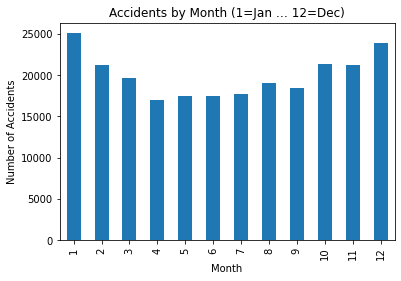

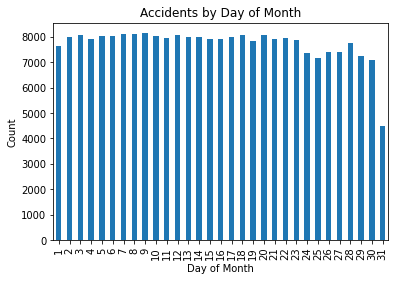

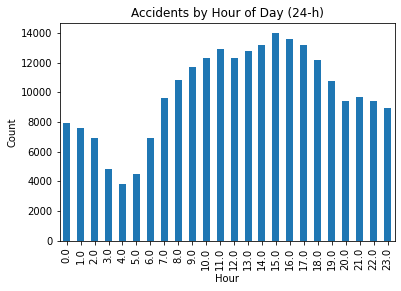

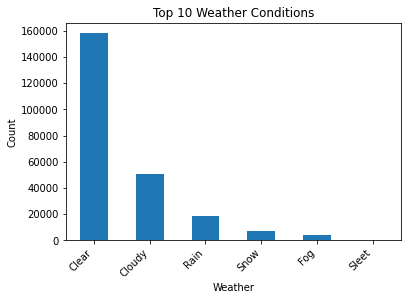

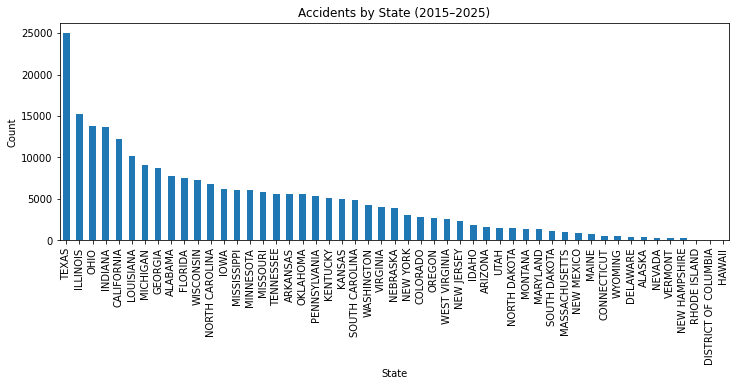

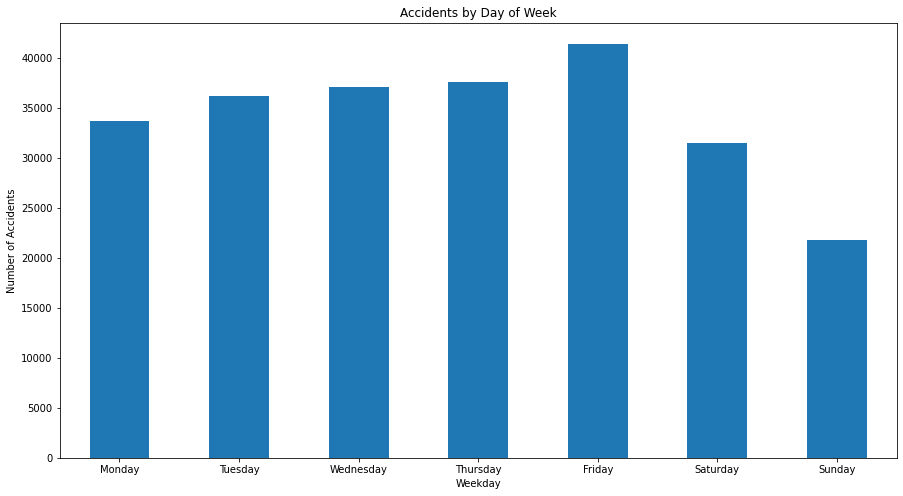

In [ ]:
import matplotlib.pyplot as plt
# A) Accidents by Month
acc_by_month = df['Month'].value_counts().sort_index()
if acc_by_month.empty:
    print("⚠️ No non-null values found in 'MonthNum'; check your data.")
else:
    plt.figure()
    acc_by_month.plot(kind='bar')
    plt.title('Accidents by Month (1=Jan … 12=Dec)')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.show()


# B) Accidents by Day of Week
# If you prefer “Day” → Monday…Sunday, map numeric day→name, or just plot the raw Day field.
df['Day'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.show()

# C) Accidents by Hour of Day
df['Hour24'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by Hour of Day (24-h)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# D) Top Weather Conditions
df['Weather Condition'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# E) Accidents by State
df['State Name'].value_counts().plot(kind='bar', figsize=(12,4))
plt.title('Accidents by State (2015–2025)')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


# Extract weekday name
df['Weekday'] = df['Date'].dt.day_name()

# Plot accidents by weekday in calendar order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
acc_by_weekday = df['Weekday'].value_counts().reindex(order)

plt.figure(figsize=(15, 8))

acc_by_weekday.plot(kind='bar')
plt.title('Accidents by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

def weekday_hour_heatmap(df):
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

    d = df.dropna(subset=["Weekday", "Hour24"]).copy()
    d["Hour24"] = pd.to_numeric(d["Hour24"], errors="coerce").astype("Int64")
    d = d.dropna(subset=["Hour24"])
    d["Weekday"] = pd.Categorical(d["Weekday"].astype(str), categories=order, ordered=True)

    # counts
    heat = (d.groupby(["Weekday","Hour24"]).size()
              .rename("Accidents").reset_index())

    # pivot + force full 7x24 grid
    pivot = (heat.pivot(index="Weekday", columns="Hour24", values="Accidents")
                 .reindex(index=order, columns=list(range(24)), fill_value=0))

    fig = px.imshow(
        pivot,
        color_continuous_scale="YlOrRd",  # yellow -> red
        aspect="equal",                  # square cells
        labels=dict(x="Hour (0–23)", y="Weekday", color="# Accidents"),
    )

    # small height, still readable
    fig.update_layout(
        height=280,
        width=960,
        margin=dict(l=40, r=20, t=50, b=40),
        title="Accidents by Weekday × Hour"
    )

    # force all hour ticks 0..23
    fig.update_xaxes(tickmode="array", tickvals=list(range(24)), ticktext=[str(h) for h in range(24)])

    return fig




# Streamlit usage:
# st.plotly_chart(weekday_hour_heatmap(df), use_container_width=True)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def weekday_hour_heatmap_matplotlib(df):
    order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

    d = df.dropna(subset=["Weekday", "Hour24"]).copy()
    d["Hour24"] = pd.to_numeric(d["Hour24"], errors="coerce")
    d = d.dropna(subset=["Hour24"])
    d["Hour24"] = d["Hour24"].astype(int)

    # group + pivot, force full 7x24 grid
    pivot = (
        d.groupby(["Weekday", "Hour24"]).size()
         .unstack(fill_value=0)
         .reindex(index=order, fill_value=0)
         .reindex(columns=list(range(24)), fill_value=0)
    )

    # small height; square-ish boxes: width/height ratio ~ 24/7
    fig_w = 12
    fig_h = fig_w * (7/24)  # makes cells close to square
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))

    im = ax.imshow(pivot.values, aspect="equal", cmap="YlOrRd")  # yellow->red

    # ticks and labels
    ax.set_xticks(np.arange(24))
    ax.set_xticklabels([str(h) for h in range(24)], fontsize=8)
    ax.set_yticks(np.arange(len(order)))
    ax.set_yticklabels(order, fontsize=9)

    ax.set_xlabel("Hour (0–23)")
    ax.set_ylabel("Weekday")
    ax.set_title("Accidents by Weekday × Hour", pad=10)

    cbar = fig.colorbar(im, ax=ax, fraction=0.03, pad=0.02)
    cbar.set_label("# Accidents")

    plt.tight_layout()
    return fig, ax

# Notebook usage:
fig, ax = weekday_hour_heatmap_matplotlib(df)
plt.show()

# Streamlit usage
# fig, ax = weekday_hour_heatmap_matplotlib(df)
# st.pyplot(fig, clear_figure=True)


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# 2) Map numeric State Code → USPS
fips_to_usps = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT',
    10:'DE', 11:'DC',12:'FL',13:'GA',15:'HI',16:'ID',17:'IL',18:'IN',
    19:'IA',20:'KS',21:'KY',22:'LA',23:'ME',24:'MD',25:'MA',26:'MI',
    27:'MN',28:'MS',29:'MO',30:'MT',31:'NE',32:'NV',33:'NH',34:'NJ',
    35:'NM',36:'NY',37:'NC',38:'ND',39:'OH',40:'OK',41:'OR',42:'PA',
    44:'RI',45:'SC',46:'SD',47:'TN',48:'TX',49:'UT',50:'VT',51:'VA',
    53:'WA',54:'WV',55:'WI',56:'WY'
}


df = df[pd.to_numeric(df['State Code'], errors='coerce').notna()]
df['State FIPS'] = df['State Code'].astype(int)
df['state_abbrev'] = df['State FIPS'].map(fips_to_usps)
df = df.dropna(subset=['state_abbrev'])

# Build counts with clear column names
vc = df['state_abbrev'].value_counts()
state_counts = pd.DataFrame({
    'state': vc.index.tolist(),
    'count': vc.values.tolist()
})

# Now plot
fig = px.choropleth(
    state_counts,
    locations='state',          # two-letter codes
    locationmode='USA-states',
    color='count',
    color_continuous_scale='viridis_r',
    scope='usa',
    labels={'count':'# Accidents'},
    title='Rail–Highway Accidents by State (2015–2025)'
)
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


# 2) Map FIPS → USPS state codes
fips_to_usps = {
     1:'AL', 2:'AK', 4:'AZ', 5:'AR', 6:'CA', 8:'CO', 9:'CT',10:'DE',
    11:'DC',12:'FL',13:'GA',15:'HI',16:'ID',17:'IL',18:'IN',19:'IA',
    20:'KS',21:'KY',22:'LA',23:'ME',24:'MD',25:'MA',26:'MI',27:'MN',
    28:'MS',29:'MO',30:'MT',31:'NE',32:'NV',33:'NH',34:'NJ',35:'NM',
    36:'NY',37:'NC',38:'ND',39:'OH',40:'OK',41:'OR',42:'PA',44:'RI',
    45:'SC',46:'SD',47:'TN',48:'TX',49:'UT',50:'VT',51:'VA',53:'WA',
    54:'WV',55:'WI',56:'WY'
}
df['state'] = (
    pd.to_numeric(df['State Code'], errors='coerce')
      .dropna().astype(int)
      .map(fips_to_usps)
)
df = df.dropna(subset=['state'])

# 3) Compute accident counts by state
vc = df['state'].value_counts()
state_counts = pd.DataFrame({
    'state': vc.index.tolist(),
    'count': vc.values.tolist()
})

# 4) Hard-coded US state centroids (lat/lon) for label placement
centroids = pd.DataFrame({
    'state': ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA',
              'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM',
              'NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA',
              'WV','WI','WY'],
    'Latitude': [32.806671,61.370716,33.729759,34.969704,36.116203,39.059811,41.597782,39.318523,
                 38.897438,27.766279,33.040619,21.094318,44.240459,40.349457,39.849426,42.011539,
                 38.526600,37.668140,31.169546,44.693947,39.063946,42.230171,43.326618,45.694454,
                 32.741646,38.456085,46.921925,41.125370,38.313515,43.452492,40.298904,34.840515,
                 42.165726,35.630066,47.528912,40.388783,35.565342,44.572021,40.590752,41.680893,
                 33.856892,44.299782,35.747845,31.054487,40.150032,44.045876,37.769337,47.400902,
                 38.491226,44.268543,42.755966],
    'Longitude': [-86.791130,-152.404419,-111.431221,-92.373123,-119.681564,-105.311104,
                  -72.755371,-75.507141,-77.026817,-81.686783,-83.643074,-157.498337,
                  -114.478828,-88.986137,-86.258278,-93.210526,-96.726486,-84.670067,
                  -91.867805,-69.381927,-76.802101,-71.530106,-84.536095,-93.900192,
                  -89.678696,-92.288368,-110.454353,-98.268082,-117.055374,-71.563896,
                  -74.521011,-106.248482,-74.948051,-79.806419,-99.784012,-82.764915,
                  -96.928917,-122.070938,-77.209755,-71.511780,-80.945007,-99.438828,
                  -86.692345,-97.563461,-111.862434,-72.710686,-78.169968,-121.490494,
                  -80.954453,-89.616508,-107.302490]
})

# 5) Merge centroids into counts
state_counts = state_counts.merge(centroids, on='state')

# 6) Plot choropleth
fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode='USA-states',
    color='count',
    color_continuous_scale='Reds',
    scope='usa',
    labels={'count':'# Accidents'},
    title='Rail–Highway Accidents by State (2015–2025)'
)

# 7) Overlay state codes as text
fig.add_trace(go.Scattergeo(
    locations=state_counts['state'],
    locationmode='USA-states',
    lon=state_counts['Longitude'],
    lat=state_counts['Latitude'],
    text=state_counts['state'],
    mode='text',
    textfont=dict(size=9, color='black'),
    showlegend=False
))

fig.update_layout(geo=dict(scope='usa'))
fig.show()
